In [1]:
#meta 5/1/2021 Web of Sciences Data - Compile a Learning Dataset
#NLP, hierarchical text classification
#src data https://data.mendeley.com/datasets/9rw3vkcfy4/2
#citation: Kowsari, Kamran (2017), “Web of Science”, Mendeley Data, V2, doi: 10.17632/9rw3vkcfy4.2

#input: WOS5736 X and y files
#output: WOS5736_df.pkl with X input and y output (3 levels)

#history
#5/1/2021 READ INPUT FILES AND BUILD A LEARNING SET
#      Prep data - X, y (plus level 1 and level 2 target vars)

In [2]:
import time as time #to track performance time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

from bs4 import BeautifulSoup
from scipy import stats

from joblib import load, dump

In [3]:
#global vars

#$kaggle
#TRAIN_FILE = '../input/dir/file.txt'

X_FILE = 'myData/WOS5736/X.txt'
Y_FILE = 'myData/WOS5736/Y.txt'
YL1_FILE = 'myData/WOS5736/YL1.txt'
YL2_FILE = 'myData/WOS5736/YL2.txt'


# Web of Sciences - Compile a Learning Dataset

Description of Dataset: 

Here is three datasets which include WOS-11967 , WOS-46985, and WOS-5736
Each folder contains:  
- X.txt  
- Y.txt  
- YL1.txt  
- YL2.txt  

X is input data that include text sequences  
Y is target value  
YL1 is target value of level one (parent label)  
YL2 is target value of level one (child label)  

## 0. Load Learning Data
X and y files

In [4]:
#read file - each line is a record
with open(X_FILE) as f:
    lines = []
    for line in f.readlines():
        line = line.rstrip('\n\n')
        #line = line.split(' ')
        lines.append(line)
        
print(lines[0:2])

print ('X size: ', len(lines))

#create df
df_X = pd.DataFrame(lines, columns = ['X'])
print(df_X.shape)
df_X.head()


['Phytoplasmas are insect-vectored bacteria that cause disease in a wide range of plant species. The increasing availability of molecular DNA analyses, expertise and additional methods in recent years has led to a proliferation of discoveries of phytoplasma-plant host associations and in the numbers of taxonomic groupings for phytoplasmas. The widespread use of common names based on the diseases with which they are associated, as well as separate phenetic and taxonomic systems for classifying phytoplasmas based on variation at the 16S rRNA-encoding gene, complicates interpretation of the literature. We explore this issue and related trends through a focus on Australian pathosystems, providing the first comprehensive compilation of information for this continent, covering the phytoplasmas, host plants, vectors and diseases. Of the 33 16Sr groups reported internationally, only groups I, II, III, X, XI and XII have been recorded in Australia and this highlights the need for ongoing biosec

,X
0,Phytoplasmas are insect-vectored bacteria that...
1,"Background: (-)-alpha-Bisabolol, also known as..."
2,A universal feature of the replication of posi...
3,"1,2-Dichloropropane (1,2-DCP) and dichlorometh..."
4,This paper presents the simulation results of ...


In [5]:
#create df
df_y = pd.read_csv(Y_FILE, header=None, names = ['y']) #, delimiter = "\t"
print(df_y.shape)
df_y.head()

(5736, 1)


,y
0,9
1,7
2,7
3,9
4,1


In [6]:
#create df
df_y_l1 = pd.read_csv(YL1_FILE, header=None, names = ['y_l1']) #, delimiter = "\t"
print(df_y_l1.shape)
df_y_l1.head()

(5736, 1)


,y_l1
0,2
1,2
2,2
3,2
4,0


In [7]:
#create df
df_y_l2 = pd.read_csv(YL2_FILE, header=None, names = ['y_l2']) #, delimiter = "\t"
print(df_y_l2.shape)
df_y_l2.head()

(5736, 1)


,y_l2
0,2
1,0
2,0
3,2
4,1


In [8]:
#merge into 1 df
df = pd.concat([df_X, df_y_l1, df_y_l2, df_y], axis=1)
print(df.shape)
df.head()

(5736, 4)


,X,y_l1,y_l2,y
0,Phytoplasmas are insect-vectored bacteria that...,2,2,9
1,"Background: (-)-alpha-Bisabolol, also known as...",2,0,7
2,A universal feature of the replication of posi...,2,0,7
3,"1,2-Dichloropropane (1,2-DCP) and dichlorometh...",2,2,9
4,This paper presents the simulation results of ...,0,1,1


## EDA

- Visualize target vars

[2 0 1]
2    2847
1    1597
0    1292
Name: y_l1, dtype: int64


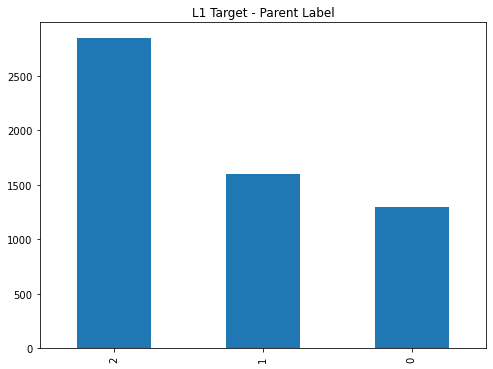

In [9]:
print(df['y_l1'].unique())
print(df['y_l1'].value_counts())
#visualize labels shape - only 11 labels
df['y_l1'].value_counts().plot(kind='bar', title = 'L1 Target - Parent Label');

[2 0 1 3]
0    1590
2    1549
1    1482
3    1115
Name: y_l2, dtype: int64


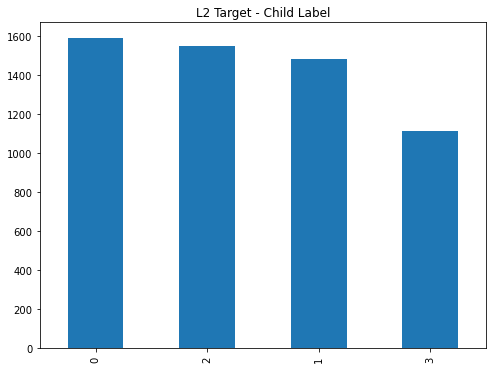

In [10]:
print(df['y_l2'].unique())
print(df['y_l2'].value_counts())
#visualize labels shape - only 12 labels
df['y_l2'].value_counts().plot(kind='bar', title = 'L2 Target - Child Label');

[ 9  7  1 10  3  6  5  2  8  4  0]
9     750
7     746
10    699
8     652
0     447
1     426
2     419
6     416
4     404
3     397
5     380
Name: y, dtype: int64


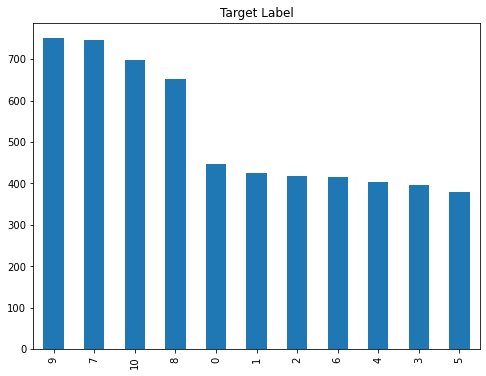

In [11]:
print(df['y'].unique())
print(df['y'].value_counts())
#visualize labels shape - only y labels
df['y'].value_counts().plot(kind='bar', title = 'Target Label');


In [12]:
#export df
dump(df, 'myOutput/WOS5736_df.pkl')

['myOutput/WOS5736_df.pkl']